In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten, Attention
from tensorflow.keras.callbacks import History

2023-12-13 12:24:10.554926: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 12:24:10.603236: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 12:24:10.603274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 12:24:10.604706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 12:24:10.611981: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 12:24:10.612807: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load and preprocess the dataset
df = pd.read_csv('/home/disi/ff/Datasets/Dataset_3/Occupancy_Estimation.csv')
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

X = df.drop('Room_Occupancy_Count', axis=1).values
y = df['Room_Occupancy_Count'].values

In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM layer
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [19]:
# Define LSTM model with Attention
input_layer = Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]))
lstm_out = LSTM(50, return_sequences=True)(input_layer)
dropout = Dropout(0.2)(lstm_out)
attention = Attention()([dropout, dropout])
flat = Flatten()(attention)
dense = Dense(50, activation='relu')(flat)
output = Dense(1)(dense)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [20]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


W0000 00:00:1702470717.611929  210366 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


203/203 [==============================] - 3s 5ms/step - loss: 0.1370 - mae: 0.1537 - val_loss: 0.0540 - val_mae: 0.0981
Epoch 2/10
  1/203 [..............................] - ETA: 0s - loss: 0.0298 - mae: 0.0919

W0000 00:00:1702470718.703456  210366 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


203/203 [==============================] - 1s 3ms/step - loss: 0.0438 - mae: 0.0959 - val_loss: 0.0308 - val_mae: 0.0690
Epoch 3/10
203/203 [==============================] - 1s 2ms/step - loss: 0.0285 - mae: 0.0771 - val_loss: 0.0311 - val_mae: 0.0633
Epoch 4/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0256 - mae: 0.0728 - val_loss: 0.0205 - val_mae: 0.0485
Epoch 5/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0234 - mae: 0.0679 - val_loss: 0.0201 - val_mae: 0.0482
Epoch 6/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0175 - mae: 0.0599 - val_loss: 0.0183 - val_mae: 0.0394
Epoch 7/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0166 - mae: 0.0570 - val_loss: 0.0182 - val_mae: 0.0406
Epoch 8/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0154 - mae: 0.0543 - val_loss: 0.0164 - val_mae: 0.0355
Epoch 9/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0146 - mae:

In [21]:
# Predictions after training
y_pred = model.predict(X_test_scaled)

64/64 [==============================] - 0s 1ms/step


W0000 00:00:1702470728.220789  210366 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


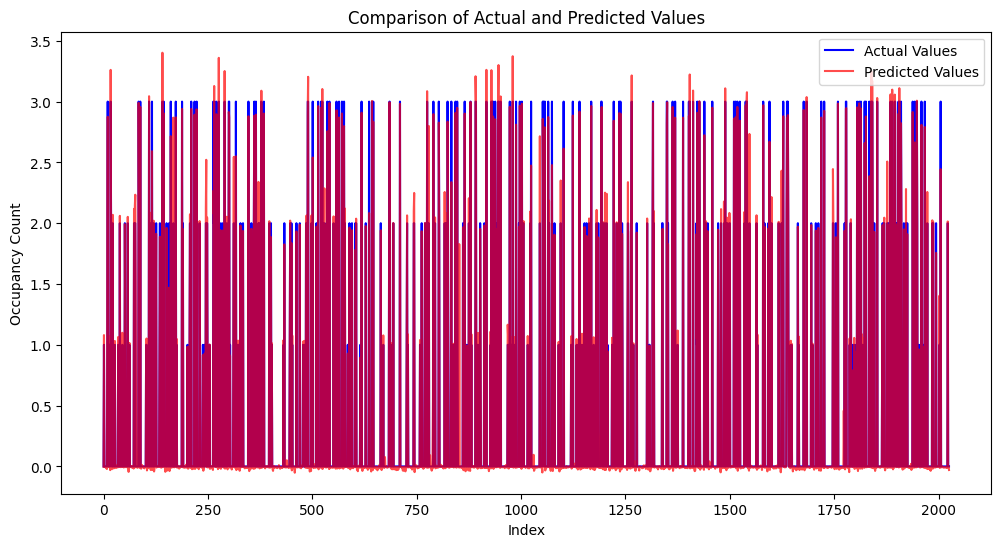

In [23]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Occupancy Count')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Before Training')

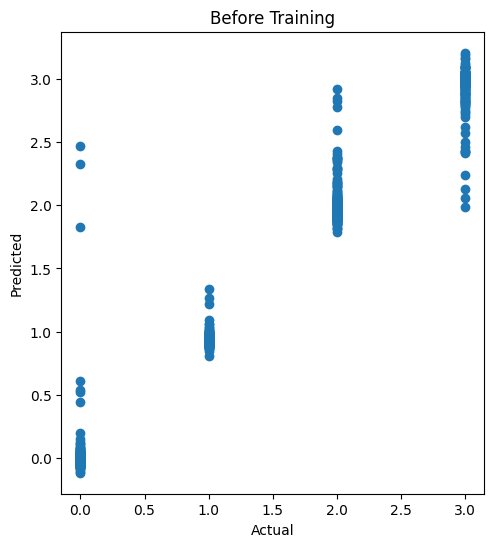

In [16]:
# Plot before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_before)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Before Training')

In [17]:
# Predictions after training
y_pred_after = model.predict(X_test_scaled)

64/64 [==============================] - 0s 1ms/step


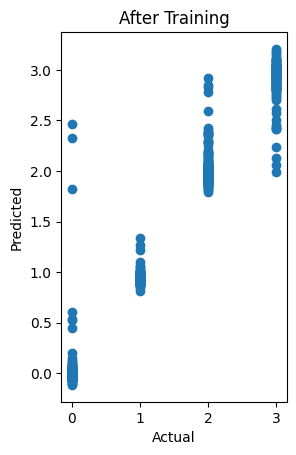

In [18]:
# Plot after training
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_after)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('After Training')
plt.show()

Text(0, 0.5, 'Frequency')

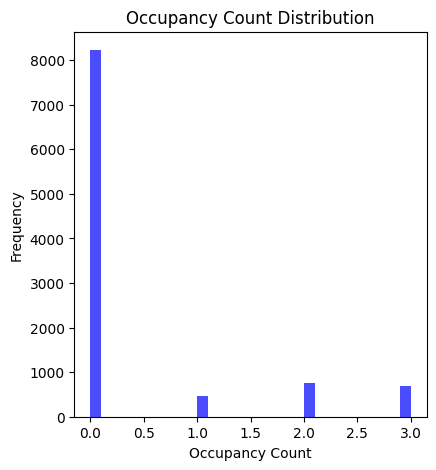

In [3]:
# Visualize data before training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title('Occupancy Count Distribution')
plt.xlabel('Occupancy Count')
plt.ylabel('Frequency')


In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM layer
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [6]:
# Define LSTM model with Attention
input_layer = Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]))
lstm_out = LSTM(50, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
Dropout = 
flat = Flatten()(attention)
dense = Dense(50, activation='relu')(flat)
output = Dense(1)(dense)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary
model.summary()

2023-12-13 12:25:22.630221: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 18)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 1, 50)                13800     ['input_1[0][0]']             
                                                                                                  
 attention (Attention)       (None, 1, 50)                0         ['lstm[0][0]',                
                                                                     'lstm[0][0]']                
                                                                                                  
 flatten (Flatten)           (None, 50)                   0         ['attention[0][0]']       

In [7]:
# Train the model and capture the history
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10


W0000 00:00:1702470333.880840  210366 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


254/254 [==============================] - 3s 4ms/step - loss: 0.1230 - mae: 0.1280 - val_loss: 0.0443 - val_mae: 0.0802
Epoch 2/10
  1/254 [..............................] - ETA: 0s - loss: 0.0137 - mae: 0.0705

W0000 00:00:1702470335.124473  210366 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


254/254 [==============================] - 1s 2ms/step - loss: 0.0221 - mae: 0.0615 - val_loss: 0.0267 - val_mae: 0.0568
Epoch 3/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0142 - mae: 0.0465 - val_loss: 0.0192 - val_mae: 0.0464
Epoch 4/10
254/254 [==============================] - 1s 2ms/step - loss: 0.0121 - mae: 0.0419 - val_loss: 0.0155 - val_mae: 0.0407
Epoch 5/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0089 - mae: 0.0348 - val_loss: 0.0155 - val_mae: 0.0437
Epoch 6/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0077 - mae: 0.0309 - val_loss: 0.0149 - val_mae: 0.0421
Epoch 7/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0072 - mae: 0.0297 - val_loss: 0.0116 - val_mae: 0.0314
Epoch 8/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0068 - mae: 0.0286 - val_loss: 0.0140 - val_mae: 0.0379
Epoch 9/10
254/254 [==============================] - 1s 3ms/step - loss: 0.0064 - mae:

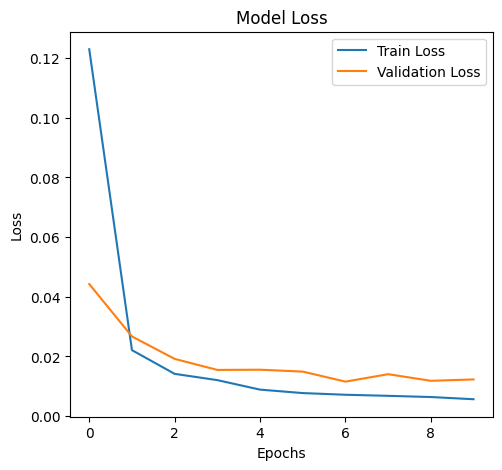

In [8]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

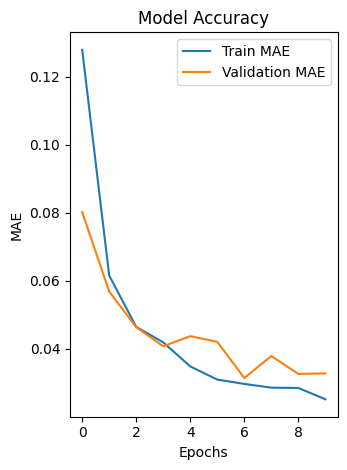

In [9]:
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()